<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/Nlp_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
data = {
    "review": [
        "Amazing product, totally worth it!",
        "Worst experience ever, waste of money.",
        "Pretty decent for the price.",
        "Terrible quality, broke in two days.",
        "I absolutely love this! Highly recommend.",
        "Not bad, but delivery was delayed.",
        "Horrible packaging and bad service.",
        "Great value for money, super useful.",
    ],
    "label": [
        "positive", "negative", "positive", "negative",
        "positive", "neutral", "negative", "positive"
    ]
}

In [6]:
df = pd.DataFrame(data)
df

,review,label
0,"Amazing product, totally worth it!",positive
1,"Worst experience ever, waste of money.",negative
2,Pretty decent for the price.,positive
3,"Terrible quality, broke in two days.",negative
4,I absolutely love this! Highly recommend.,positive
5,"Not bad, but delivery was delayed.",neutral
6,Horrible packaging and bad service.,negative
7,"Great value for money, super useful.",positive


In [7]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()                                # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)            # remove symbols
    tokens = word_tokenize(text)                       # tokenize
    tokens = [w for w in tokens if w not in stop_words] # remove stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens]  # lemmatize
    return " ".join(tokens)

In [8]:
df

,review,label
0,"Amazing product, totally worth it!",positive
1,"Worst experience ever, waste of money.",negative
2,Pretty decent for the price.,positive
3,"Terrible quality, broke in two days.",negative
4,I absolutely love this! Highly recommend.,positive
5,"Not bad, but delivery was delayed.",neutral
6,Horrible packaging and bad service.,negative
7,"Great value for money, super useful.",positive


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["review"])
y = df["label"]

In [12]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 44 stored elements and shape (8, 41)>

In [13]:
y

,label
0,positive
1,negative
2,positive
3,negative
4,positive
5,neutral
6,negative
7,positive


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds))

Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         1
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
def predict_sentiment(text):
    clean = clean_text(text)
    vec = vectorizer.transform([clean])
    return model.predict(vec)[0]
print(predict_sentiment("I love this product, amazing quality!"))
print(predict_sentiment("Worst item ever, broke immediately."))

positive
positive


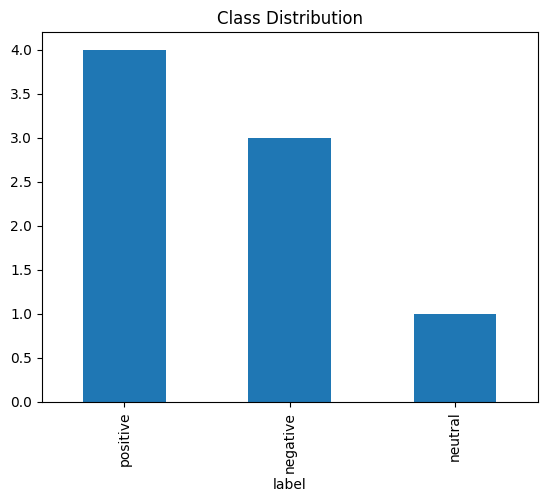

In [20]:
df["label"].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.show()

In [21]:
from sklearn.svm import LinearSVC

In [22]:
model2 = LinearSVC()

In [23]:
model2.fit(X_train,y_train)

LinearSVC()

In [25]:
pred_2 = model2.predict(X_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, pred_2))
print("\nClassification Report:\n", classification_report(y_test, pred_2))

Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         1
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
print(predict_sentiment("I hate this "))

positive


In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = MultinomialNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [30]:
print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
